# Departamento de Engenharia de Teleinformática
# Curso de Graduação em Engenharia de Telecomuniucações
# TI0077 - Inteligência Computacional Aplicada
## Homework 02 - Models for regression - Part 2/2

Parte 1 questão 0: [Parte 1: Pré-processamento](preprocessing_data_hw02.ipynb)

### Alunos:

- Ezequias Márcio Silva de Santana Júnior - 371887
- Ingrid Simões Moreira Furtado - 375147
- Yuri Sales Ribeiro - 375177

#### Observações:
Para utilizar esse notebook é necessario ter Python3 instalado, juntamente com os pacotes listados abaixo:

- `numpy 1.16.2`
- `pandas 0.24.2`
- `matplotlib 3.0.3`
- `seaborn 0.9.0`
- `scipy 1.2.2`
- `scikit-learn 0.21.3`  

Este notebook, os dados utilizados e eventuais tabelas e figuras salvas encontam-se disponiveis no seguinte 
repositório: https://github.com/ezequiasjunior/ica2019.2

Ao executar este notebook localmente, serão gerados arquivos ```.pdf``` e tabelas ```.xlsx```, ```.tex```.

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
sns.set_style("whitegrid")
np.set_printoptions(5)


### Carregando o conjunto de treino e de validação

Como resultado do notebook da parte 1, os conjuntos de treino e validação transformados junto com suas respectivas saídas Y são carregados nas células abaixo.

 São $D = 6$ preditores com $N = 302240$ observações no conjunto de treino e $N =15121$ no conjunto de validação.

In [3]:
# Loading transformed predictors data:
mos_train = pd.read_excel('hw2-data/Xtrans_mos_train.xlsx')
# Loading outcome data:
mos_Ytrain = pd.read_excel('hw2-data/Y_mos_train.xlsx')
# Info:
unc_monovar(mos_train)
unc_monovar(mos_Ytrain)

,count,mean,std,skewness,min,25%,50%,75%,max
Test Hour,30240.0,-7.102261e-14,1.0,-0.232189,-2.065819,-0.695499,0.122942,0.767480,1.722096
Signal (dBm),30240.0,-1.194020e-12,1.0,0.048122,-3.478094,-0.707686,-0.056239,0.731306,1.632615
Speed (m/s),30240.0,-2.459041e-15,1.0,0.692597,-0.758048,-0.758048,-0.758048,1.169655,1.677909
Distance from site (m),30240.0,1.553501e-14,1.0,-0.021584,-2.426782,-0.688249,0.039530,0.717163,2.819824
Call Test Duration (s),30240.0,7.116715e-13,1.0,-0.000543,-2.188723,-1.000037,0.939352,1.000218,1.000218
Call Test Setup Time (s),30240.0,-6.746335e-14,1.0,1.976446,-2.356230,-0.066317,0.164377,0.418045,27.911710


,count,mean,std,skewness,min,25%,50%,75%,max
MOS,30240.0,2.513519,1.106711,0.265466,1.0,2.1,2.7,2.7,4.4


In [4]:
# Loading the transformed validation dataset:
mos_X = pd.read_excel('hw2-data/Xtrans_mos_valid.xlsx')
# Loading outcome validation data:
mos_Y = pd.read_excel('hw2-data/Y_mos_valid.xlsx')
# Info:
unc_monovar(mos_X)
unc_monovar(mos_Y)

,count,mean,std,skewness,min,25%,50%,75%,max
Test Hour,15121.0,-5.314103e-14,1.0,-0.221734,-2.081963,-0.683479,-0.024196,0.782161,1.731320
Signal (dBm),15121.0,3.120522e-14,1.0,0.045501,-3.494258,-0.713355,-0.058228,0.734563,1.643168
Speed (m/s),15121.0,1.897533e-16,1.0,0.678215,-0.764371,-0.764371,-0.764371,1.174163,1.671729
Distance from site (m),15121.0,2.100047e-14,1.0,-0.021071,-2.414575,-0.681690,0.036183,0.723740,2.844543
Call Test Duration (s),15121.0,-6.235965e-12,1.0,0.007547,-1.067998,-0.996156,-0.996156,1.004140,1.004140
Call Test Setup Time (s),15121.0,-2.318844e-14,1.0,2.321188,-2.331119,-0.040559,0.190482,0.436222,31.288539


,count,mean,std,skewness,min,25%,50%,75%,max
MOS,15121.0,2.504213,1.108045,0.267559,1.0,2.0,2.7,2.7,4.4


### Regressão linear - Ordinary Least Squares

Na célula abaixo, é feita a regressão linear para construir o modelo de predição $Y = X\beta + \epsilon$, utilizando o conjunto de módulos do pacote Scikit Learn que calcula os coeficientes do modelo usando: $$\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$$

In [224]:
# Build the model:
ols = linear_model.LinearRegression()
# Model fitting using the train set:
ols.fit(mos_train.values, mos_Ytrain.values)
# Model output: estimated coeff. independent term + D=6 weigths
ols_beta = np.hstack([ols.intercept_[:, np.newaxis], ols.coef_]) 

# Testing the model:
# Estimate the outcome using the validation set: real data = mos_Y
ols_Y = ols.predict(mos_X.values)
# Compute the RMSE and the R2 scores using scikit-learn built-in functions
ols_rmse = np.sqrt(mean_squared_error(mos_Y, ols_Y))
ols_r2 = r2_score(mos_Y, ols_Y)

# Cross validation scheme: considering k=10 (N >10e3 samples)
ols_cv_r2 = cross_val_score(ols, mos_train.values, mos_Ytrain.values, cv=10)
ols_cv_rmse = cross_val_score(ols, mos_train.values, mos_Ytrain.values, 
                                   scoring='neg_mean_squared_error',cv=10)
ols_cv_rmse = np.sqrt(-ols_cv_rmse)

# View results:
print(f'''OLS model coefficients.: b0, ..., b6\n
{ols_beta.T}\n
OLS performance - validation set:\n
RMSE: {ols_rmse}
R2: {ols_r2}\n
Residuals:\n {(mos_Y - ols_Y).describe()}\n 
OLS 10-fold CV R2 performance: (train set)\n\n{ols_cv_r2}
mean: {ols_cv_r2.mean()}\n
OLS 10-fold CV RMSE performance: (train set)\n\n{ols_cv_rmse}
mean: {ols_cv_rmse.mean()}''')

OLS model coefficients.: b0, ..., b6

[[ 2.51352e+00]
 [ 2.27591e-03]
 [ 2.04386e-01]
 [ 4.41301e-02]
 [ 1.12052e-01]
 [-1.59253e-01]
 [ 4.37108e-02]]

OLS performance - validation set:

RMSE: 1.0860665524846698
R2: 0.039213394767109055

Residuals:
                 MOS
count  15121.000000
mean      -0.009306
std        1.086063
min       -2.324613
25%       -0.675206
50%       -0.018455
75%        0.429736
max        2.509622
 
OLS 10-fold CV R2 performance: (train set)

[0.03607 0.03736 0.03158 0.03451 0.04824 0.02851 0.03444 0.03108 0.0409
 0.0403 ]
mean: 0.03629851809929413

OLS 10-fold CV RMSE performance: (train set)

[1.10168 1.08523 1.07291 1.08276 1.06947 1.10747 1.08531 1.08568 1.08517
 1.08714]
mean: 1.086282471619898


### Regressão linear com restrições - Ridge

Na célula abaixo, é feita a regressão linear para construir o modelo de predição, utilizando o conjunto de módulos do pacote Scikit Learn que calcula os coeficientes do modelo usando a abordagem com restrição L-2: $$\hat{\beta} = (X^{T}X -\lambda I)^{-1}X^{T}Y$$

onde $\lambda$ é o hiperparâmetro a ser otimizado.

In [137]:
# Build the model: default lambda = 1 
ridge = linear_model.Ridge()
# Model fitting using the train set:
ridge.fit(mos_train.values, mos_Ytrain.values)
# Model output: estimated coeff. independent term + D=6 weigths
ridge_beta = np.hstack([ridge.intercept_[:, np.newaxis], ridge.coef_]) 

# Testing the model:
# Estimate the outcome using the validation set: real data = mos_Y
ridge_Y = ridge.predict(mos_X.values)
# Compute the RMSE and the R2 scores using scikit-learn built-in functions
ridge_rmse = np.sqrt(mean_squared_error(mos_Y, ridge_Y))
ridge_r2 = r2_score(mos_Y, ridge_Y)

# View results:
print(f'''Ridge model coefficients.: b0, ..., b6 (lambda = 1)\n
{ridge_beta.T}\n
Ridge performance - validation set:\n
RMSE: {ridge_rmse}
R2: {ridge_r2}\n
Residuals:\n {(mos_Y - ridge_Y).describe()}\n''')

Ridge model coefficients.: b0, ..., b6 (lambda = 1)

[[ 2.51352e+00]
 [ 2.27796e-03]
 [ 2.04373e-01]
 [ 4.41312e-02]
 [ 1.12042e-01]
 [-1.59239e-01]
 [ 4.37072e-02]]

Ridge performance - validation set:

RMSE: 1.0860666439283146
R2: 0.0392132329762267

Residuals:
                 MOS
count  15121.000000
mean      -0.009306
std        1.086063
min       -2.324548
25%       -0.675199
50%       -0.018456
75%        0.429742
max        2.509583



### Busca pelo hiperparâmetro $\lambda$

In [170]:
# Range of hyperparam lambda [0, 50]:
lambd = np.linspace(0, 50, 100)
# Variables for mean of CV metrics:
cv_rmse = np.zeros(lambd.size)
cv_r2 = np.zeros(lambd.size)
# Perform CV profile:
for idx, l in enumerate(lambd):
    cv_ridge = linear_model.Ridge(alpha=l)
    cv_r2[idx] = cross_val_score(cv_ridge, mos_train.values, mos_Ytrain.values, cv=10).mean()
    cv_ridge_rmse = cross_val_score(cv_ridge, mos_train.values, mos_Ytrain.values, 
                                         scoring='neg_mean_squared_error',cv=10).mean()
    cv_rmse[idx] = np.sqrt(-cv_ridge_rmse)

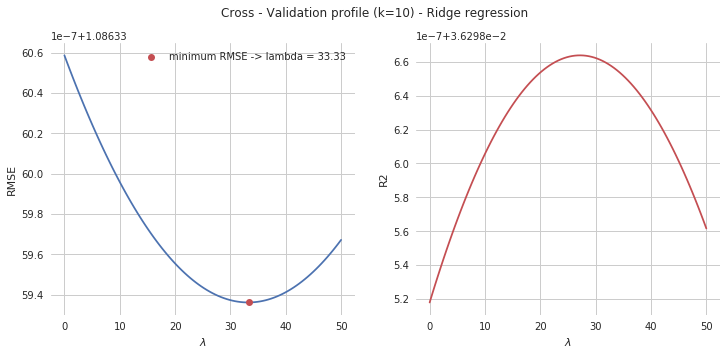

In [191]:
# Process report:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Cross - Validation profile (k=10) - Ridge regression')
ax[0].plot(lambd, cv_rmse,'C0-')
ax[0].set_xlabel('$\lambda$')
ax[0].set_ylabel('RMSE')
ax[0].plot(lambd[np.argmin(cv_rmse)], np.min(cv_rmse), 'C2o', 
           label=f'minimum RMSE -> lambda = {lambd[np.argmin(cv_rmse)]:.4}') # minimum rmse point
ax[0].legend()
ax[1].plot(lambd, cv_r2,'C2-')
ax[1].set_xlabel('$\lambda$')
ax[1].set_ylabel('R2')
plt.show()

In [172]:
# Build the model with lambda opt = 33.33
ridge_opt = linear_model.Ridge(alpha=lambd[np.argmin(cv_rmse)])
# Model fitting using the train set:
ridge_opt.fit(mos_train.values, mos_Ytrain.values)
# Model output: estimated coeff. independent term + D=6 weigths
ridge_opt_beta = np.hstack([ridge_opt.intercept_[:, np.newaxis], ridge_opt.coef_]) 

# Testing the model:
# Estimate the outcome using the validation set: real data = mos_Y
ridge_opt_Y = ridge_opt.predict(mos_X.values)
# Compute the RMSE and the R2 scores using scikit-learn built-in functions
ridge_opt_rmse = np.sqrt(mean_squared_error(mos_Y, ridge_opt_Y))
ridge_opt_r2 = r2_score(mos_Y, ridge_opt_Y)

# View results:
print(f'''Ridge model coefficients.: b0, ..., b6 (lambda = 33.67)\n
{ridge_opt_beta.T}\n
Ridge performance - validation set:\n
RMSE: {ridge_opt_rmse}
R2: {ridge_opt_r2}\n
Residuals:\n {(mos_Y - ridge_opt_Y).describe()}\n''')

Ridge model coefficients.: b0, ..., b6 (lambda = 33.67)

[[ 2.51352e+00]
 [ 2.34398e-03]
 [ 2.03964e-01]
 [ 4.41637e-02]
 [ 1.11740e-01]
 [-1.58791e-01]
 [ 4.35885e-02]]

Ridge performance - validation set:

RMSE: 1.0860696908893002
R2: 0.039207841992317305

Residuals:
                 MOS
count  15121.000000
mean      -0.009306
std        1.086066
min       -2.322451
25%       -0.674963
50%       -0.018452
75%        0.429947
max        2.508311



RMSE difference (ols_rmse): [0.00000e+00 9.14436e-08 3.13840e-06]


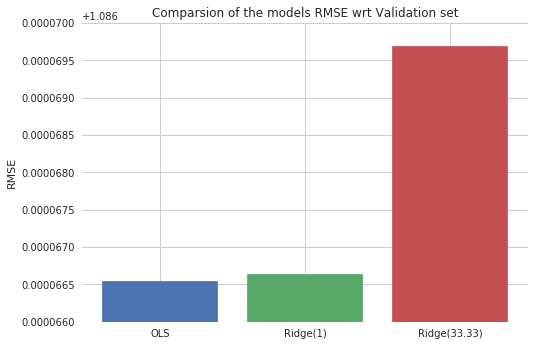

In [175]:
# Comparsion os the models - RMSE:
print(f'''RMSE difference (ols_rmse): {[ols_rmse, ridge_rmse, ridge_opt_rmse] - ols_rmse}''')
plt.title('Comparsion of the models RMSE wrt Validation set')
plt.bar([0,1,2], [ols_rmse, ridge_rmse, ridge_opt_rmse], color=['C0', 'C1', 'C2'], 
                            tick_label=['OLS', 'Ridge(1)', 'Ridge(33.33)'])
plt.ylabel('RMSE')
plt.ylim([1.086066, 1.08607])
plt.show()

###  PLS or a PCR

- a) Use the transformed predictors in the training set to learn either a PLS or a PCR
regression model and test the model using the test set (remember to apply the
same pre-processing you used on the training set).

- b) Determine the optimal number
of components using a 5- or 10-fold cross-validation based on the RMSE (you can
only use the training set in this phase). Report on process (show the cross-validation
profile, both in terms of the RMSE and R2). Report the accuracy (RMSE and
R2) obtained on the test set.

In [196]:

# Principal component analysis:
pca = PCA(n_components=6)
pca.fit(mos_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [237]:
pca = PCA(n_components=2)
pc_train_set = pca.fit_transform(mos_train.values)
pcr = linear_model.LinearRegression()
pcr.fit(pc_train_set, mos_Ytrain.values)
print(pcr.intercept_, pcr.coef_)
pcr_Y = pcr.predict(pca.fit_transform(mos_X.values))
np.sqrt(mean_squared_error(mos_Y.values, pcr_Y)), r2_score(mos_Y.values, pcr_Y)

[2.51352] [[-0.0109   0.08767]]


(1.102506026651721, 0.009906963419900827)

### PLS

In [242]:
pls = PLSRegression(n_components=2)
pls.fit(mos_train.values, mos_Ytrain.values)
pls_Y = pls.predict(mos_X.values)
np.sqrt(mean_squared_error(mos_Y.values, pls_Y)), r2_score(mos_Y.values, pls_Y)

(1.0867222040654438, 0.03805300289082303)

In [248]:
#
PCs = np.arange(mos_train.shape[1])+1
cv_rmsePCR = np.zeros(PCs.size)
cv_r2PCR = np.zeros(PCs.size)
#
cv_rmsePLS = np.zeros(PCs.size)
cv_r2PLS = np.zeros(PCs.size)
#
for idx, val in enumerate(PCs):
    #CV PCR
    pca = PCA(n_components=val)
    pc_train_set = pca.fit_transform(mos_train.values)
    cv_pcr = linear_model.LinearRegression()
    cv_r2PCR[idx] = cross_val_score(cv_pcr, pc_train_set, mos_Ytrain.values, cv=10).mean()
    cv_pcr_rmse = cross_val_score(cv_pcr, pc_train_set, mos_Ytrain.values, 
                                         scoring='neg_mean_squared_error', cv=10).mean()
    cv_rmsePCR[idx] = np.sqrt(-cv_pcr_rmse)

    # CV PLS
    cv_pls = PLSRegression(n_components=val)
    cv_r2PLS[idx] = cross_val_score(cv_pls, mos_train.values, mos_Ytrain.values, cv=10).mean()
    cv_pls_rmse = cross_val_score(cv_pls, mos_train.values, mos_Ytrain.values, 
                                         scoring='neg_mean_squared_error', cv=10).mean()
    cv_rmsePLS[idx] = np.sqrt(-cv_pls_rmse)

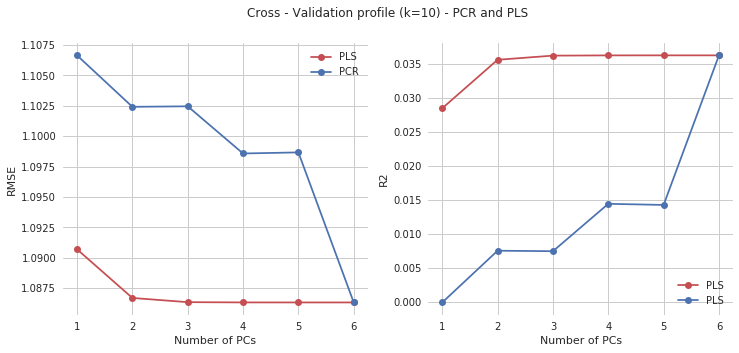

In [251]:
# Process report:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Cross - Validation profile (k=10) - PCR and PLS')
ax[0].plot(PCs, cv_rmsePLS,'C2-o', label='PLS')
ax[0].plot(PCs, cv_rmsePCR,'C0-o', label='PCR')
ax[0].set_xlabel('Number of PCs')
ax[0].set_ylabel('RMSE')
ax[0].legend()
ax[1].plot(PCs, cv_r2PLS,'C2-o', label='PLS')
ax[1].plot(PCs, cv_r2PCR,'C0-o', label='PLS')
ax[1].legend()
ax[1].set_xlabel('Number of PCs')
ax[1].set_ylabel('R2')
plt.show()

In [260]:
# Report the accuracy (RMSE and R2) obtained on the test set. using PLS nº PCs = 4
pls = PLSRegression(n_components=4)
pls.fit(mos_train.values, mos_Ytrain.values)
pls_Y = pls.predict(mos_X.values)
np.sqrt(mean_squared_error(mos_Y.values, pls_Y)), r2_score(mos_Y.values, pls_Y)

(1.0860667646975044, 0.03921301929975218)